**2D Transformations Exercise**

In this exercise you will practice transforming objects in 2D using numpy and matplotlib.

Step 1: Fill in the missing parts for the function `construct_transformation_matrix`. You will need to look up the formula for 2D rotation and scale matrices and combine these with a translation vector to return a homogeneous transformation matrix.

Step 2: In the scene below there are three objects. `obj1` and `obj2` are defined by transformation matrix parameters, while `objTarget` is defined by the locations of its corner points. Your task is to modify the transformation parameters of `obj2` to match the position of `objTarget`.

2.1: First match the position of `objTarget` using `origin=[0, 0, 0]`

2.2: Then create a new object, `obj3`, and match the position of `objTarget` using `origin=[1, 1, 0]`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
from math import sin, cos

In [ ]:
""" Given a rotation angle (theta) in radians,
    a translation vector [tX, tY],
    and a scale vector [sX, sY],
    construct a 2D transformation matrix """

def construct_transform_matrix(params):
  theta = params[0]
  tX = params[1][0]
  tY = params[1][1]
  sX = params[2][0]
  sY = params[2][1]

  R = np.array([ [cos(theta), -sin(theta)],
                 [sin(theta),  cos(theta)] ])
  S = np.array([ [sX, 0],
                 [0, sY] ])
  T = np.array([ [tX], [tY] ])

  # order of operations: first scale, then rotate, then translate
  M = np.vstack( [np.hstack([R @ S, T]), np.array([0, 0, 1])] )
  return M

In [ ]:
""" Given an origin [x, y, 0] and
    points of the form [[x], [y], [1]], and
    a 2D transformation matrix of size (3,3),
    return points transformed with respect to the origin """

def transform_pts(pts, origin, transform):
  centered_pts = pts - origin
  tr_pts = transform @ np.transpose(centered_pts)
  out_pts = np.transpose(tr_pts) + origin
  return out_pts

In [ ]:
""" Given a plot axis and a list of objects,
    where each object is a dict containing fields
    'params', 'points', and 'origin',
    transform and plot each object in the scene """

def plot_scene(obj_list, ax):
  for i, obj in enumerate(obj_list):
    M = construct_transform_matrix(obj['params'])
    pts = transform_pts(obj['points'], obj['origin'], M)
    color = list(mcolors.TABLEAU_COLORS)[i]
    #print(i)
    #print(pts[:, :2])
    ax.add_patch(Polygon(pts[:, :2], closed=False, color=color))

In [ ]:
# construct scene
# vertex order is clockwise from top left
# param order is rotation, translation, scale

obj1 = {'points': np.array([ [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1] ]),
        'origin': np.array([0, 0, 0]),
        'params': [np.deg2rad(0), [0, 0], [1, 1]]}

obj2 = {'points': np.array([ [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1] ]),
        'origin': np.array([0, 0, 0]),
        'params': [np.deg2rad(100), [0, 0], [2, 1]]}

objSolution1 = {'points': np.array([ [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1] ]),
                'origin': np.array([0, 0, 0]),
                'params': [np.deg2rad(60), [4, 1.2], [1.5, 2]]}

objSolution2 = {'points': np.array([ [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1] ]),
                'origin': np.array([1, 1, 0]),
                'params': [np.deg2rad(60), [2, 2.5], [1.5, 2]]}

objTarget = {'points': np.array([ [4, 1.2, 1], [4.75, 2.5, 1], [3, 3.5, 1], [2.268, 2.2, 1] ]),
             'origin': np.array([0, 0, 0]),
             'params': [np.deg2rad(0), [0, 0], [1, 1]]}

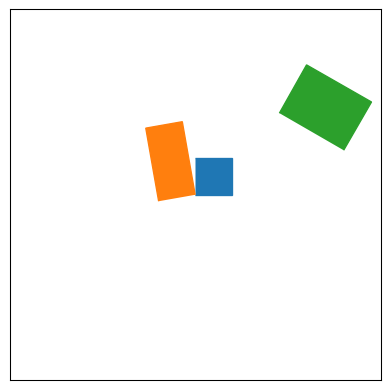

In [ ]:
# plot scene

dpi = 96
fig = plt.figure(figsize=(800/dpi, 400/dpi), dpi=dpi)
ax = fig.add_subplot()
plot_scene([obj1, obj2, objTarget], ax)

ax.set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.draw()
plt.tight_layout()